In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def redo_columns(filename):

    clean_cols = []

    for co in pd.read_csv(filename).columns:
        if '_A.' in co:
            clean_cols.append(co.split('_A.')[1])
        elif '_RV.' in co:
            clean_cols.append(co.split('_RV.')[1])
        else:
            clean_cols.append(co)
            
    return clean_cols

def preprocess(filename):
    
    df = pd.read_csv(filename)
    df.columns = redo_columns(filename)
    year = df['year'].iloc[0].astype(str)
    
    return df, year

def open_and_concat(filelist):
    
    df2 , year2  = preprocess(filelist[2])
    df3 , year3  = preprocess(filelist[3])
    df4 , year4  = preprocess(filelist[4])
    df5 , year5  = preprocess(filelist[5])
    df6 , year6  = preprocess(filelist[6])
    df7 , year7  = preprocess(filelist[7])
    df8 , year8  = preprocess(filelist[8])
    df9 , year9  = preprocess(filelist[9])
    df10, year10 = preprocess(filelist[10])
    
    df = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10], 
                   keys=[year2, year3, year4, year5, year6, year7, year8, year9, year10], 
                   sort=False)
    
    return df

In [3]:
path =r'/glade/scratch/molina/Completions/'
all_files = glob.glob(path + "completions_floridastateuniversity_*.csv")
all_files = sorted(all_files)

In [4]:
df = open_and_concat(all_files)

In [5]:
df

unitid          institution name  year First or Second Major  \
2011 0   134097  Florida State University  2011           First major   
     1   134097  Florida State University  2011           First major   
     2   134097  Florida State University  2011           First major   
     3   134097  Florida State University  2011           First major   
     4   134097  Florida State University  2011           First major   
...         ...                       ...   ...                   ...   
2019 64  134097  Florida State University  2019           First major   
     65  134097  Florida State University  2019           First major   
     66  134097  Florida State University  2019           First major   
     67  134097  Florida State University  2019           First major   
     68  134097  Florida State University  2019           First major   

        CIP Code -  2010 Classification                  CipTitle  \
2011 0                             '40'         Physical Sciences   
     1                             '40'         Physical Sciences   
     2                             '40'         Physical Sciences   
     3                             '40'         Physical Sciences   
     4                             '40'         Physical Sciences   
...                                 ...                       ...   
2019 64                         '40.99'  Physical Sciences, Other   
     65                         '40.99'  Physical Sciences, Other   
     66                       '40.9999'  Physical Sciences, Other   
     67                       '40.9999'  Physical Sciences, Other   
     68                       '40.9999'  Physical Sciences, Other   

                                          Award Level code  Grand total  \
2011 0                                   Bachelor's degree          102   
     1                                     Master's degree           52   
     2                                       Degrees total          218   
     3                          Degrees/certificates total          218   
     4   Doctor's degree - research/scholarship (new de...           64   
...                                                    ...          ...   
2019 64                         Degrees/certificates total            1   
     65             Doctor's degree - research/scholarship            1   
     66                                      Degrees total            1   
     67                         Degrees/certificates total            1   
     68             Doctor's degree - research/scholarship            1   

         Grand total men  Grand total women  ...  Two or more races men  \
2011 0                74                 28  ...                      0   
     1                36                 16  ...                      0   
     2               156                 62  ...                      0   
     3               156                 62  ...                      0   
     4                46                 18  ...                      0   
...                  ...                ...  ...                    ...   
2019 64                1                  0  ...                      0   
     65                1                  0  ...                      0   
     66                1                  0  ...                      0   
     67                1                  0  ...                      0   
     68                1                  0  ...                      0   

         Two or more races women  Race/ethnicity unknown total  \
2011 0                         0                             1   
     1                         0                             1   
     2                         0                             3   
     3                         0                             3   
     4                         0                             1   
...                          ...                           ...   
2019 64                        0       

In [6]:
df.groupby('year').sum()[['Hispanic or Latino women', 'Grand total women']]

,Hispanic or Latino women,Grand total women
year,,
2011,18,585
2012,45,747
2013,90,819
2014,81,702
2015,135,846
2016,90,873
2017,81,828
2018,72,810
2019,54,684


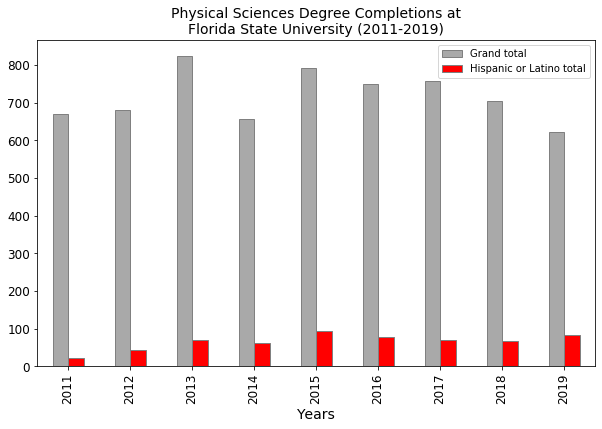

In [7]:
df.loc[df['CipTitle'] == 'Physical Sciences'].groupby(['CipTitle','year']).sum()[['Grand total','Hispanic or Latino total',
                                                                                  ]].plot.bar(figsize=(10,6), subplots=False, label='', 
                                                                                              color=['darkgrey','red'], edgecolor='grey')
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8], [2011,2012,2013,2014,2015,2016,2017,2018,2019], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Physical Sciences Degree Completions at\nFlorida State University (2011-2019)', fontsize=14)
plt.savefig('bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

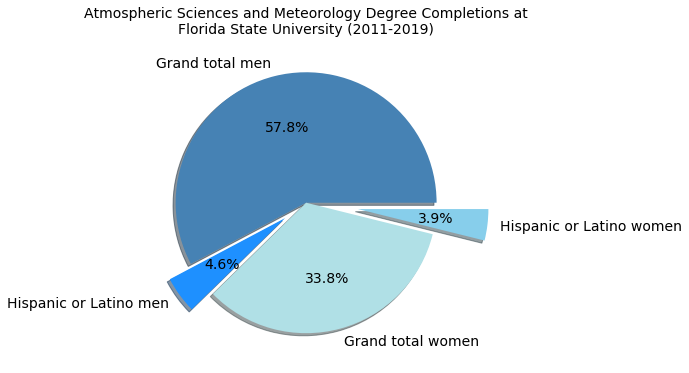

In [8]:
df_ps_2 = df.loc[df['CipTitle'] == 'Atmospheric Sciences and Meteorology, General'].groupby(['CipTitle','year']).sum()[['Grand total men',
                                                                                            'Hispanic or Latino men', 
                                                                                            'Grand total women',
                                                                                            'Hispanic or Latino women']].sum()
df_ps_2.index.name = 'Physical Sciences'
explode = (0, 0.2, 0, 0.4)
colors = ['steelblue', 'dodgerblue', 'powderblue', 'skyblue']
df_ps_2.plot.pie(figsize=(6,6), subplots=False, label='', autopct='%1.1f%%', shadow=True, startangle=0, fontsize=14, explode=explode, colors=colors)
plt.title('Atmospheric Sciences and Meteorology Degree Completions at\nFlorida State University (2011-2019)', fontsize=14)
plt.savefig('pie_chala.png', bbox_inches='tight', dpi=200)
plt.show()

In [9]:
df['CipTitle'].unique()

array(['Physical Sciences', 'Atmospheric Sciences and Meteorology',
       'Atmospheric Sciences and Meteorology, General', 'Chemistry',
       'Chemistry, General', 'Chemistry, Other',
       'Geological and Earth Sciences/Geosciences',
       'Geology/Earth Science, General',
       'Oceanography, Chemical and Physical', 'Physics',
       'Physics, General', 'Physics, Other', 'Materials Sciences',
       'Materials Science', 'Chemical Physics',
       'Physical Sciences, Other'], dtype=object)

In [10]:
df.columns.unique()

Index(['unitid', 'institution name', 'year', 'First or Second Major',
       'CIP Code -  2010 Classification', 'CipTitle', 'Award Level code',
       'Grand total', 'Grand total men', 'Grand total women',
       'American Indian or Alaska Native total',
       'American Indian or Alaska Native men',
       'American Indian or Alaska Native women', 'Asian total', 'Asian men',
       'Asian women', 'Black or African American total',
       'Black or African American men', 'Black or African American women',
       'Hispanic or Latino total', 'Hispanic or Latino men',
       'Hispanic or Latino women',
       'Native Hawaiian or Other Pacific Islander total',
       'Native Hawaiian or Other Pacific Islander men',
       'Native Hawaiian or Other Pacific Islander women', 'White total',
       'White men', 'White women', 'Two or more races total',
       'Two or more races men', 'Two or more races women',
       'Race/ethnicity unknown total', 'Race/ethnicity unknown men',
       'Race/eth